## İmport

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Veri Analizi

In [2]:
data = pd.read_csv("/home/osman/Documents/projeler/Android-App-Malicious-anlysis/datasets/drebin-215-dataset-5560malware-9476-benign.csv")
data.head()


/tmp/ipykernel_17958/4125006795.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/home/osman/Documents/projeler/Android-App-Malicious-anlysis/datasets/drebin-215-dataset-5560malware-9476-benign.csv")


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [3]:
data.shape

(15036, 216)

In [4]:
print("veri sayısı: ",data.count().sum())
print("boyutu: ",len(data))

veri sayısı:  3247776
boyutu:  15036


In [5]:
data.isnull().sum().sum()

0

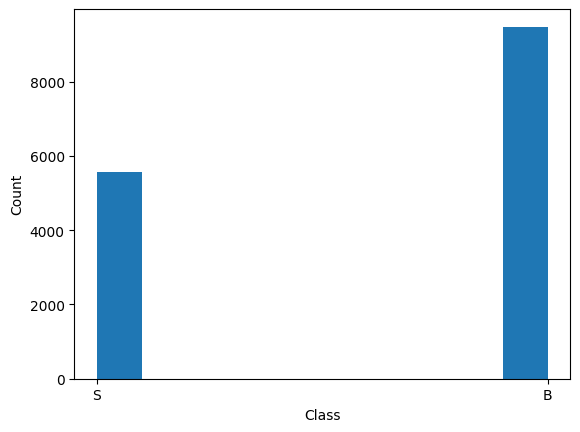

In [6]:
plt.hist(data["class"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

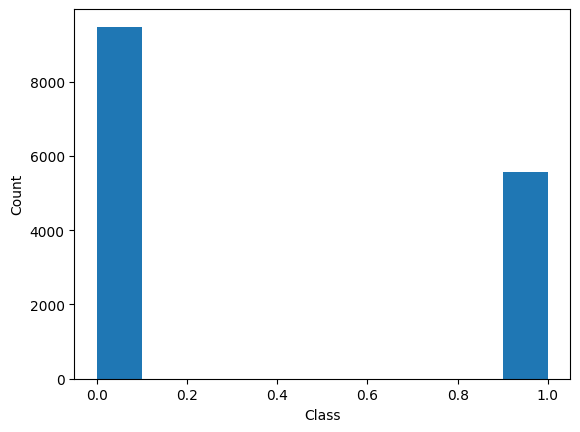

In [7]:
import pandas as pd

# class,B=Benign; S=Malware
# 'class' kolonundaki 'S' olanları 1, 'B' olanları 0 yapın
data['class'] = data['class'].apply(lambda x: 1 if x == 'S' else 0)

plt.hist(data["class"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()



In [8]:
def kolonda_kelime_bulma(kelime):
    kolon_isimleri = data.columns
    signature_kolonlari = [kolon for kolon in kolon_isimleri if kelime in kolon]
    
    print(kelime, " İçeren Kolon İsimleri:")
    for indeks, kolon in enumerate(signature_kolonlari):
        print(f"  {kolon} - İndeks: {indeks}")
    
    print("Eleman sayisi:", len(signature_kolonlari))

In [9]:
kolonda_kelime_bulma("bindService")

bindService  İçeren Kolon İsimleri:
  bindService - İndeks: 0
  Context.bindService - İndeks: 1
Eleman sayisi: 2


## Veri Tipi Kontrolü

In [10]:
import pandas as pd

def check_data_types(data):
    data_types_count = {}
    columns_with_types = {}

    for column in data.columns:
        data_type = data[column].dtype
        data_types_count[str(data_type)] = data_types_count.get(str(data_type), 0) + 1
        columns_with_types.setdefault(str(data_type), []).append(column)

    return data_types_count, columns_with_types



data_types_count, columns_with_types = check_data_types(data)

print("Veri Tipleri ve Sayıları:")
for data_type, count in data_types_count.items():
    print(f"{data_type}: {count}")

print("\nHer Kolondaki Veri Tipleri:")
for data_type, columns in columns_with_types.items():
    print(f"{data_type}: {', '.join(columns)}")


Veri Tipleri ve Sayıları:
int64: 215
object: 1

Her Kolondaki Veri Tipleri:
int64: transact, onServiceConnected, bindService, attachInterface, ServiceConnection, android.os.Binder, SEND_SMS, Ljava.lang.Class.getCanonicalName, Ljava.lang.Class.getMethods, Ljava.lang.Class.cast, Ljava.net.URLDecoder, android.content.pm.Signature, android.telephony.SmsManager, READ_PHONE_STATE, getBinder, ClassLoader, Landroid.content.Context.registerReceiver, Ljava.lang.Class.getField, Landroid.content.Context.unregisterReceiver, GET_ACCOUNTS, RECEIVE_SMS, Ljava.lang.Class.getDeclaredField, READ_SMS, getCallingUid, Ljavax.crypto.spec.SecretKeySpec, android.intent.action.BOOT_COMPLETED, USE_CREDENTIALS, MANAGE_ACCOUNTS, android.content.pm.PackageInfo, KeySpec, TelephonyManager.getLine1Number, DexClassLoader, HttpGet.init, SecretKey, Ljava.lang.Class.getMethod, System.loadLibrary, android.intent.action.SEND, Ljavax.crypto.Cipher, WRITE_SMS, READ_SYNC_SETTINGS, AUTHENTICATE_ACCOUNTS, android.telephony.gsm.S

## Kolon Bulma

In [11]:
import pandas as pd

def kolon_bul(kolonName):
    if kolonName in data.columns:
        # Kolonun içerdiği değerleri yazdır
        print(f"{kolonName} Kolonu Değerleri:\n{data[kolonName].values}")

        # Kolondaki eleman sayısını yazdır
        eleman_sayisi = data[kolonName].count()
        print(f"{kolonName} Kolonundaki Eleman Sayısı: {eleman_sayisi}")

    else:
        print(f"{kolonName} Kolonu bulunamadı.")
        print("Kolonlar:", data.columns)
        print("Toplam Kolon Sayısı:", len(data.columns))



In [12]:
kolon_bul("TelephonyManager.getSimCountryIso")

TelephonyManager.getSimCountryIso Kolonu Değerleri:
['0' '0' '0' ... 0 0 1]
TelephonyManager.getSimCountryIso Kolonundaki Eleman Sayısı: 15036


## Kolon Silme

In [13]:
def gereksiz_stunları_sil(df, sutunName):
  df = df.drop(sutunName, axis=1)
  return df

In [14]:
data=gereksiz_stunları_sil(data ,['TelephonyManager.getSimCountryIso'])

## EĞİTİM TEST BÖLME 

In [15]:
y = data["class"]
x = data.drop("class", axis=1)

In [16]:
print("x: ",x.shape)
print("y: ",y.shape)

x:  (15036, 214)
y:  (15036,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_test)

       transact  onServiceConnected  bindService  attachInterface  \
13309         0                   0            0                0   
12832         1                   1            1                1   
6393          0                   0            0                0   
4990          1                   1            1                1   
12460         1                   1            1                1   
...         ...                 ...          ...              ...   
7677          0                   0            0                0   
8257          0                   0            0                0   
13090         0                   0            0                0   
2699          0                   0            0                0   
7760          0                   0            0                0   

       ServiceConnection  android.os.Binder  SEND_SMS  \
13309                  0                  0         0   
12832                  1                  1         0   


In [18]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (12028, 214)
X_test:  (3008, 214)
y_train:  (12028,)
y_test:  (3008,)


In [19]:
Tümsonuclar= {}

## LogisticRegression

In [20]:
Tümsonuclar = {}

modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)

y_pred = modelLR.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Doğruluk Oranı: {accuracy:.2f}")

Tümsonuclar["modelLR"] = accuracy


Model Doğruluk Oranı: 0.97


## Hata Matrisi modelR

In [21]:
# y_pred = modelLR.predict(X_test)
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)
# sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlGnBu")
# plt.xlabel("Tahmin")
# plt.ylabel("Gerçek Değer")
# plt.show()

## SVC

In [22]:
from sklearn.svm import SVC

modelSVM = SVC()
modelSVM.fit(X_train, y_train)

y_pred = modelSVM.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model doğruluk oranı: {accuracy:.2f}")
Tümsonuclar["modelSVM"] = accuracy


Model doğruluk oranı: 0.98


## Hata Matrisi modelSVM

In [23]:
# y_pred = modelSVM.predict(X_test)
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)
# sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlGnBu")
# plt.xlabel("Tahmin")
# plt.ylabel("Gerçek Değer")
# plt.show()

## DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)

y_pred = modelDT.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Doğruluk Oranı: {accuracy:.2f}")

Tümsonuclar["modelDT"] = accuracy

Model Doğruluk Oranı: 0.98


## Hata Matrisi modelDT

In [25]:
# y_pred = modelDT.predict(X_test)
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)
# sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlGnBu")
# plt.xlabel("Tahmin")
# plt.ylabel("Gerçek Değer")
# plt.show()

## RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

y_pred = modelRF.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Doğruluk Oranı: {accuracy:.2f}")
Tümsonuclar["modelRF"] = accuracy

Model Doğruluk Oranı: 0.99


## Hata Matrisi modelRF

In [27]:

# y_pred = modelRF.predict(X_test)
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)
# sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlGnBu")
# plt.xlabel("Tahmin")
# plt.ylabel("Gerçek Değer")
# plt.show()

## MLPClassifier

In [28]:
from sklearn.neural_network import MLPClassifier

modelMLP = MLPClassifier()
modelMLP.fit(X_train, y_train)

y_pred = modelMLP.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Doğruluk Oranı: {accuracy:.2f}")

Tümsonuclar["modelMLP"] = accuracy

Model Doğruluk Oranı: 0.99


## Hata Matrisi modelMLP

In [29]:
# y_pred = modelMLP.predict(X_test)
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)
# sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlGnBu")
# plt.xlabel("Tahmin")
# plt.ylabel("Gerçek Değer")
# plt.show()

## GaussianNB

In [30]:
from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)

y_pred = modelGNB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Doğruluk Oranı: {accuracy:.2f}")

Tümsonuclar["modelGNB"] = accuracy


Model Doğruluk Oranı: 0.71


## Hata Matrisi modelGNB

In [31]:
# y_pred = modelGNB.predict(X_test)
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)
# sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlGnBu")
# plt.xlabel("Tahmin")
# plt.ylabel("Gerçek Değer")
# plt.show()

## ÇOK SINIFLI SINIFLANDIRMA

In [32]:
def cok_sinifli_siniflandirma(Tümsonuclar):
    max_anahtar = max(Tümsonuclar, key=Tümsonuclar.get)
    max_deger = Tümsonuclar[max_anahtar]
    print(max_anahtar,max_deger)

In [33]:
cok_sinifli_siniflandirma(Tümsonuclar)

modelRF 0.9876994680851063
